<a href="https://colab.research.google.com/github/FireStrings/MasterDegree/blob/main/EDA/EDA_GV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir("/content/drive/My Drive/UFSCAR/Notebooks")

Mounted at /content/drive/


In [ ]:
estacao = "minas_gerais_gv"

In [ ]:
%run UtilsNew.ipynb

In [ ]:
set_plot_size(15, 3)

###Check raw file

In [ ]:
raw_anual_df = load_files(estacao, False)

In [ ]:
raw_anual_df.head()

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2023,0,"26,1","26,1","25,3","73,0","82,0","73,0","20,9","22,2","20,9","991,0","991,0","990,0","0,3","57,0","1,5",NaN,"0,0"
1,01/01/2023,100,"26,1","26,6","26,1","70,0","73,0","69,0","20,2","20,8","20,1","991,9","991,9","991,0","3,9","86,0","6,2",NaN,"0,0"
2,01/01/2023,200,"25,3","26,1","25,2","71,0","71,0","69,0","19,6","20,1","19,6","992,2","992,3","991,9","4,6","93,0","7,7",NaN,"0,0"
3,01/01/2023,300,"24,5","25,3","24,3","73,0","74,0","71,0","19,3","19,6","19,3","992,1","992,3","992,1","3,5","86,0","7,4",NaN,"0,0"
4,01/01/2023,400,"24,1","24,4","24,0","75,0","76,0","73,0","19,4","19,5","19,2","991,8","992,2","991,8","2,6","72,0","5,7",NaN,"0,0"


In [ ]:
raw_anual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  17544 non-null  object
 1   Hora (UTC)            17544 non-null  int64 
 2   Temp. Ins. (C)        17057 non-null  object
 3   Temp. Max. (C)        17056 non-null  object
 4   Temp. Min. (C)        17057 non-null  object
 5   Umi. Ins. (%)         17057 non-null  object
 6   Umi. Max. (%)         17057 non-null  object
 7   Umi. Min. (%)         17057 non-null  object
 8   Pto Orvalho Ins. (C)  17057 non-null  object
 9   Pto Orvalho Max. (C)  17057 non-null  object
 10  Pto Orvalho Min. (C)  17057 non-null  object
 11  Pressao Ins. (hPa)    17057 non-null  object
 12  Pressao Max. (hPa)    17057 non-null  object
 13  Pressao Min. (hPa)    17057 non-null  object
 14  Vel. Vento (m/s)      17057 non-null  object
 15  Dir. Vento (m/s)      17057 non-null

In [ ]:
total = len(raw_anual_df)
count_nulls = raw_anual_df[["Radiacao (KJ/m²)"]].notna().sum().sum()

print(total)
print(count_nulls)
print("Perc nulls:", round((count_nulls/total), 3))

17544
9431
Perc nulls: 0.538


###Check after pre processing

In [ ]:
df = load_files(estacao, True).set_index("data_hora", drop=False)

###Check the hour range

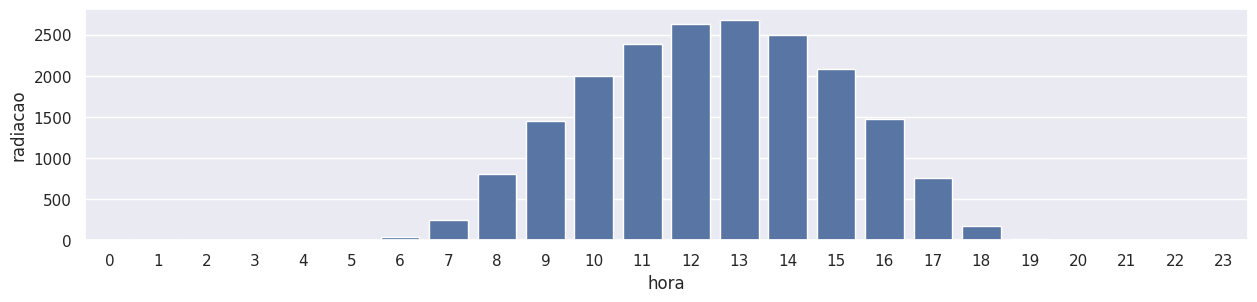

In [ ]:
plot_distrib_horario(df, None, estacao)

In [ ]:
start_hour = 7
end_hour = 18
df = filter_between(df, "hora", start_hour, end_hour)

###Time series

Whats the seasonal interval?

In [ ]:
intervalo_sazonal = get_seasonal_interval(df, start_hour)

In [ ]:
intervalo_sazonal

12

####Stationarity

#####Resample in days

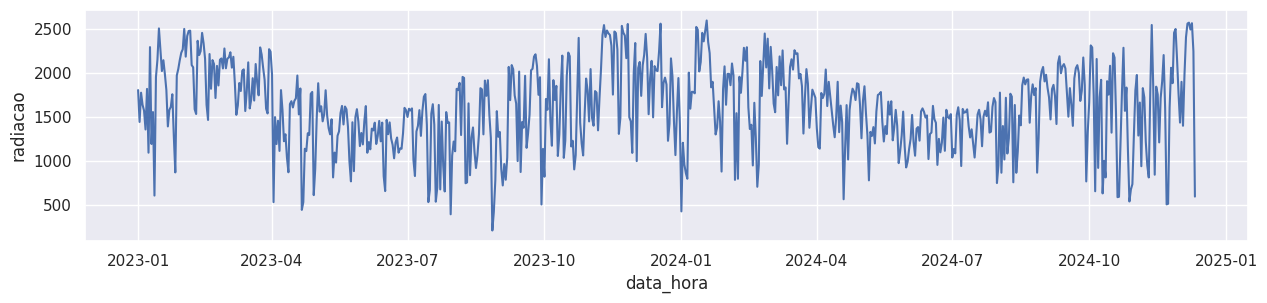

In [ ]:
df_resampled = df[["radiacao", "data_hora"]].set_index("data_hora").resample("D").mean()
plot = sns.lineplot(data=df_resampled, x="data_hora", y="radiacao")

#####Not resampled

<Axes: xlabel='data_hora', ylabel='radiacao'>

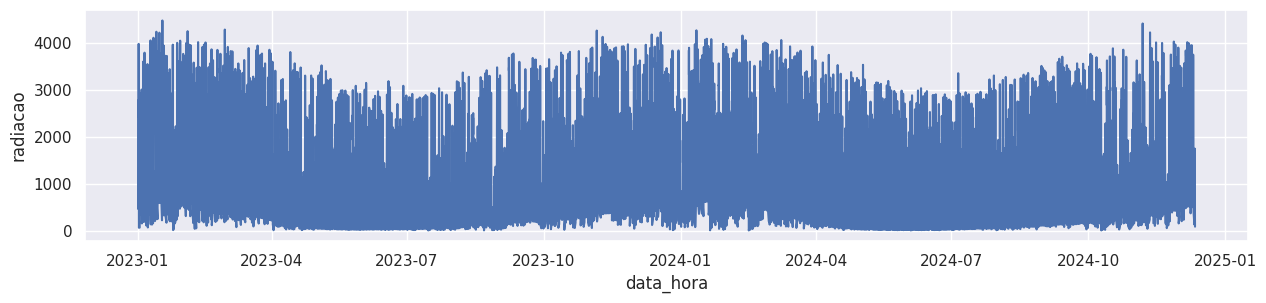

In [ ]:
sns.lineplot(data=df[["radiacao", "data_hora"]].set_index("data_hora"), x="data_hora", y="radiacao")

####Adfuler test

In [ ]:
adfuller_test(df[["radiacao", "data_hora"]].set_index("data_hora"))

Teste estatístico ADF : -9.936709355715664
p-valor : 2.7314910712710058e-17
Num Lags : 37
Numero de observações : 8487
Fortes evidências contra a hipotese nula(Ho), ou seja, pode ser rejeitada. Os dados não possuem uma raíz unitária, portanto tem estacionáriedade.


####Decomposition

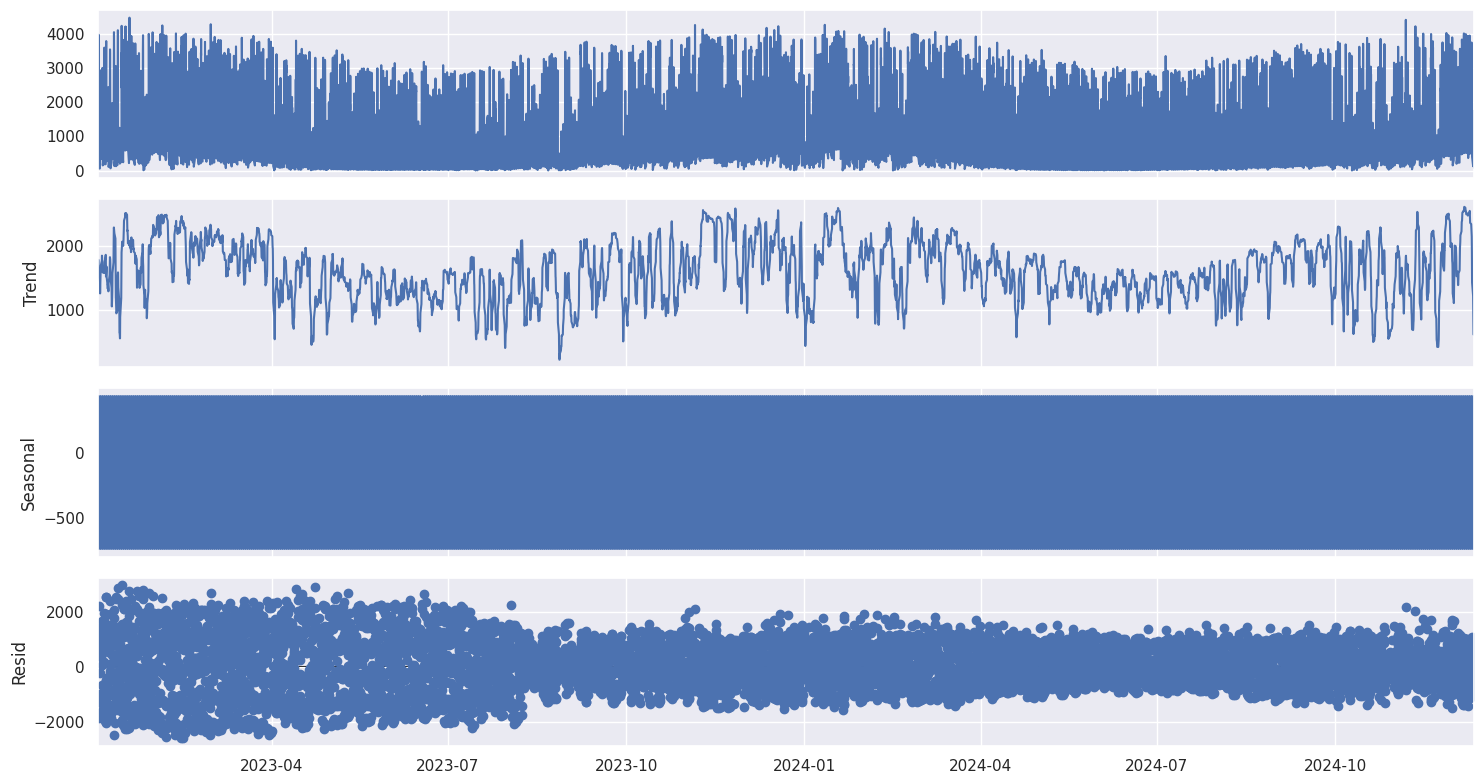

In [ ]:
set_plot_size(15, 8)

df_dec = df[["radiacao", "data_hora"]].set_index('data_hora')

# A variancia não muda ao longo do tempo, a sazonalizadade nao acompanha a tendencia, por isso o modelo aditivo
resultado = seasonal_decompose(df_dec, model="addictive", period=intervalo_sazonal)
ax = resultado.plot()

####ACF and PACF

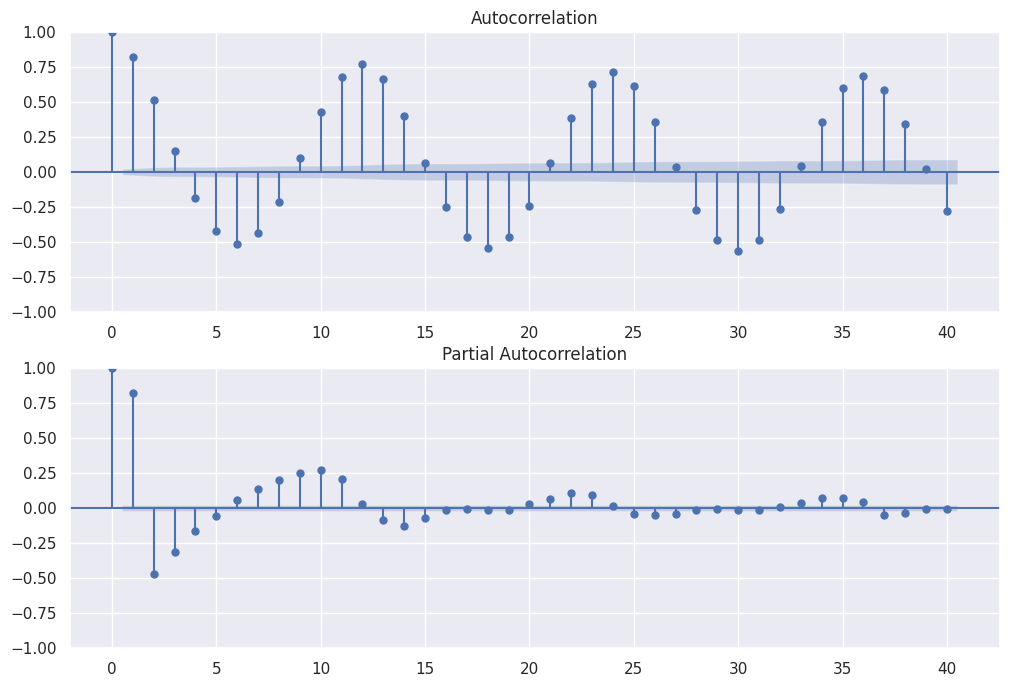

In [ ]:
calculate_acf_pacf(df)